<a href="https://colab.research.google.com/github/sonusajid004/DeepLearning_models/blob/master/FruitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!ls 'drive/My Drive'

 110010011330_2000_05_17.pdf
'17021A0542 promo'
 17522688_113670389176724_6512636427277338356_n.jpg
 19650147_1856365301350191_1015813440_o.jpg
 19718448_1953209434953921_47100731_o.jpg
'19718535_476020889403570_789960378_o (1).jpg'
 19718535_476020889403570_789960378_o.jpg
 19718600_1953209628287235_1000732828_o.jpg
 19720523_476020802736912_1961893191_o.jpg
 19723850_1951961371745394_1381303397_o.jpg
 19723885_476020329403626_1531723459_o.jpg
 19724041_476020872736905_2068933413_o.jpg
 19749644_1953209624953902_1289736475_o.jpg
 20171215_195025.jpg
 20171215_195034.jpg
'20171215_195040 (1).jpg'
 20171215_195040.jpg
'2018 Admitted Student data-Soft Copy.gsheet'
 20191103133625.pdf
'29777-10546-LAB VIVA Part-1.doc'
 4-torpen.pdf
 _9_a_1.cpp
 Abraham-Silberschatz-Operating-System-Concepts---9th2012.12.pdf
 Addresses.docx
 Addresses.gdoc
 AdsLabManual.gdoc
'Adv C++.gsheet'
 aki5c-4errc-001.jpg
 btech2013Curriculum.pdf
 bubblesortads.gdoc
'bus ticket.pdf'
'Capstone Project.gdoc'
 certific

In [6]:
!unzip '/content/drive/My Drive/fruits-360.zip'

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360/Training/Tamarillo/3_100.jpg  
  inflating: fruits-360/Training/Tamarillo/47_100.jpg  
  inflating: fruits-360/Training/Tamarillo/49_100.jpg  
  inflating: fruits-360/Training/Tamarillo/4_100.jpg  
  inflating: fruits-360/Training/Tamarillo/5_100.jpg  
  inflating: fruits-360/Training/Tamarillo/61_100.jpg  
  inflating: fruits-360/Training/Tamarillo/62_100.jpg  
  inflating: fruits-360/Training/Tamarillo/64_100.jpg  
  inflating: fruits-360/Training/Tamarillo/68_100.jpg  
  inflating: fruits-360/Training/Tamarillo/6_100.jpg  
  inflating: fruits-360/Training/Tamarillo/70_100.jpg  
  inflating: fruits-360/Training/Tamarillo/73_100.jpg  
  inflating: fruits-360/Training/Tamarillo/77_100.jpg  
  inflating: fruits-360/Training/Tamarillo/7_100.jpg  
  inflating: fruits-360/Training/Tamarillo/81_100.jpg  
  inflating: fruits-360/Training/Tamarillo/82_100.jpg  
  inflating: fruits-360/Training/Tamarillo/83_100.jpg  
  

Fruit --- 81 types of fruits


In [11]:
import os
os.listdir()

['.config', 'drive', 'fruits-360', 'sample_data']

In [12]:
#importing all the required modules
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os




In [13]:
#setting params
num_classes = 81
img_rows,img_cols = 32,32
batch_size = 16

In [17]:
#setting the train and validation directories
train_data_dir = './fruits-360/Training'
validation_data_dir = './fruits-360/Test'

In [18]:
#setting the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range = 0.3,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)


In [19]:
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 41322 images belonging to 81 classes.
Found 13877 images belonging to 81 classes.


##Lets Define our model

In [20]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=(img_rows,img_cols,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#printing model summary
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 64)       

###Lets define callback

In [24]:
from keras.optimizers import RMSprop,SGD
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau



checkpoint = ModelCheckpoint("./Trained Models/fruits_fresh_cnn_1.h5",
                             monitor = "val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose = 1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience = 3,
                          verbose =1,
                          restore_best_weights=True)

                          
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)


callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

nb_train_samples = 41322
nb_validation_samples = 13877
epochs = 10

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)




Epoch 1/10
2582/2582 [==============================] - 53s 20ms/step - loss: 0.6429 - accuracy: 0.7997 - val_loss: 0.0279 - val_accuracy: 0.9038

Epoch 00001: val_loss improved from inf to 0.02786, saving model to ./Trained Models/fruits_fresh_cnn_1.h5
Epoch 2/10
2582/2582 [==============================] - 53s 20ms/step - loss: 0.5218 - accuracy: 0.8435 - val_loss: 0.0000e+00 - val_accuracy: 0.9115

Epoch 00002: val_loss improved from 0.02786 to 0.00000, saving model to ./Trained Models/fruits_fresh_cnn_1.h5
Epoch 3/10
2582/2582 [==============================] - 53s 20ms/step - loss: 0.5497 - accuracy: 0.8524 - val_loss: 0.0000e+00 - val_accuracy: 0.9493

Epoch 00003: val_loss did not improve from 0.00000
Epoch 4/10
2582/2582 [==============================] - 53s 20ms/step - loss: 0.6607 - accuracy: 0.8433 - val_loss: 0.0000e+00 - val_accuracy: 0.8963

Epoch 00004: val_loss did not improve from 0.00000
Epoch 5/10
2582/2582 [==============================] - 52s 20ms/step - loss: 0.

Displaying Confusion Matrix

In [89]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred=model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(y_pred,axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


Confusion Matrix
[[ 20   0   0 ...   0   0   0]
 [  0 163   0 ...   0   0   0]
 [  0 136  28 ...   0   0   0]
 ...
 [  0   0   0 ... 164   0   0]
 [  0   0   0 ...   0 127   0]
 [  0   0   0 ...   0   0 249]]
Classification Report
                     precision    recall  f1-score   support

     Apple Braeburn       1.00      0.12      0.22       164
     Apple Golden 1       0.50      0.99      0.67       164
     Apple Golden 2       1.00      0.17      0.29       164
     Apple Golden 3       0.95      0.64      0.77       161
 Apple Granny Smith       1.00      1.00      1.00       164
        Apple Red 1       0.70      1.00      0.83       164
        Apple Red 2       0.75      1.00      0.85       164
        Apple Red 3       1.00      0.12      0.22       144
Apple Red Delicious       1.00      1.00      1.00       166
   Apple Red Yellow       0.99      0.83      0.90       164
            Apricot       1.00      1.00      1.00       164
            Avocado       1.00      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


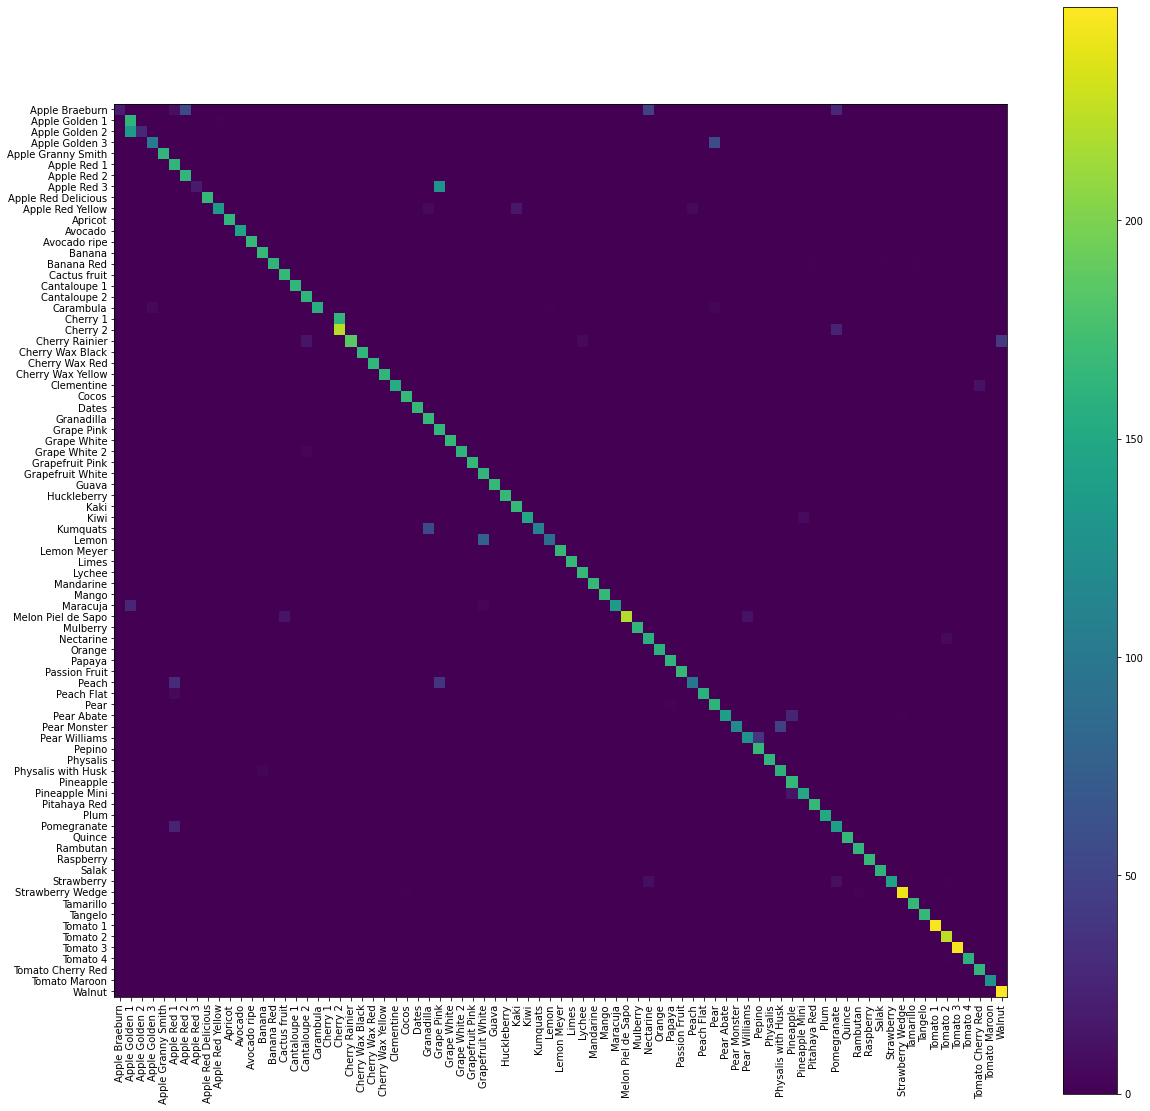

In [31]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model


img_row, img_height, img_depth = 32,32,3
model = load_model('/content/Trained Models/fruits_fresh_cnn_1.h5')

classes = list(validation_generator.class_indices.keys())


class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 41322
nb_validation_samples = 13877

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 20   0   0 ...   0   0   0]
 [  0 163   0 ...   0   0   0]
 [  0 136  28 ...   0   0   0]
 ...
 [  0   0   0 ... 164   0   0]
 [  0   0   0 ...   0 127   0]
 [  0   0   0 ...   0   0 249]]
Classification Report
                     precision    recall  f1-score   support

     Apple Braeburn       1.00      0.12      0.22       164
     Apple Golden 1       0.50      0.99      0.67       164
     Apple Golden 2       1.00      0.17      0.29       164
     Apple Golden 3       0.95      0.64      0.77       161
 Apple Granny Smith       1.00      1.00      1.00       164
        Apple Red 1       0.70      1.00      0.83       164
        Apple Red 2       0.75      1.00      0.85       164
        Apple Red 3       1.00      0.12      0.22       144
Apple Red Delicious       1.00      1.00      1.00       166
   Apple Red Yellow       0.99      0.83      0.90       164
            Apricot       1.00      1.00      1.00       164
            Avocado       1.00      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
from keras.preprocessing import image
img_width, img_height = 32, 32

i = image.load_img('/content/fruits-360/test-multiple_fruits/apple.jpg',target_size=(img_width,img_height))

In [71]:


x = image.img_to_array(i)
print(x.shape)
x=x*1./255
x = np.expand_dims(x,axis=0)

print(x.shape)
classes = model.predict_classes(x)
classes

(32, 32, 3)
[0.01568628 0.01176471 0.00392157 ... 0.41176471 0.34509805 0.3137255 ]
(1, 32, 32, 3)


array([34])

In [61]:
print('Actual','apple')
print('predicted')
list(validation_generator.class_indices.keys())[classes[0]]

Actual apple
predicted


'Guava'

In [73]:

images = []

for i in os.listdir('/content/fruits-360/test-multiple_fruits/'):
  i = image.load_img('/content/fruits-360/test-multiple_fruits/'+i,target_size=(img_width,img_height))
  x = image.img_to_array(i)
  x=x*1./255
  x = np.expand_dims(x,axis=0)
  images.append(x)


In [86]:
test_images = np.array(images)
labels = list(validation_generator.class_indices.keys())
predictions =[labels[model.predict_classes(x,batch_size=10)[0]] for x in test_images]

In [88]:
import pandas as pd
#prediction results for different images.
pd.DataFrame({'a':list(os.listdir('/content/fruits-360/test-multiple_fruits')),'b':predictions})

,a,b
0,cherry2.jpg,Cherry Wax Black
1,cocos_kiwi_orange_dates_salak_plum_tamarilo_ma...,Peach
2,strawberries3.jpg,Avocado
3,raspberry3.jpg,Mango
4,apple_grape.jpg,Apple Red 2
5,salak.jpg,Grape Pink
6,strawberries4.jpg,Banana Red
7,raspberry5.jpg,Cherry 2
8,grape_pear_mandarine2.jpg,Papaya
9,apple.jpg,Guava
